# Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# memasukan library yang akan digunakan untuk membandingkan tiga model machine learning untuk prediksi adult income.
# Model yang digunakan yaitu Decision Tree, Random Forest, dan Naive Bayes).

# Import Data

In [34]:
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/adult.csv"
df = pd.read_csv(url)
df.head()
#memasukan dataset dari github, dataset yang digunakan berformat csv dan ditampilkan

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Exploratory Data Analysis (EDA)


In [7]:
df.info()
# untuk menampilkan informasi ringkas tentang DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.describe()
# untuk menampilkan statistik deskriptif dari data numerik.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isnull().sum()
# Memanggil method isnull() pada DataFrame df untuk memeriksa nilai yang hilang (missing values).

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [10]:
# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Displaying the first few rows to verify encoding
print(df.head())

# Kode ini mempersiapkan data kategorikal dalam DataFrame agar dapat digunakan dalam model machine learning
# dengan mengubahnya menjadi data numerik menggunakan LabelEncoder dan menyimpan informasi encoding

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39 

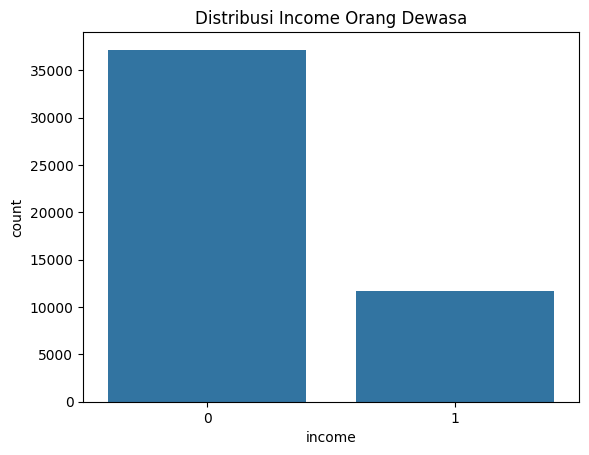

In [11]:
sns.countplot(x='income', data=df)
plt.title('Distribusi Income Orang Dewasa')
plt.show()
# membuat plot batang yang menunjukkan distribusi dari kolom 'income' dalam DataFrame df.
# Plot ini memberikan gambaran visual tentang berapa banyak orang dewasa yang memiliki penghasilan
# di atas atau di bawah 50K.

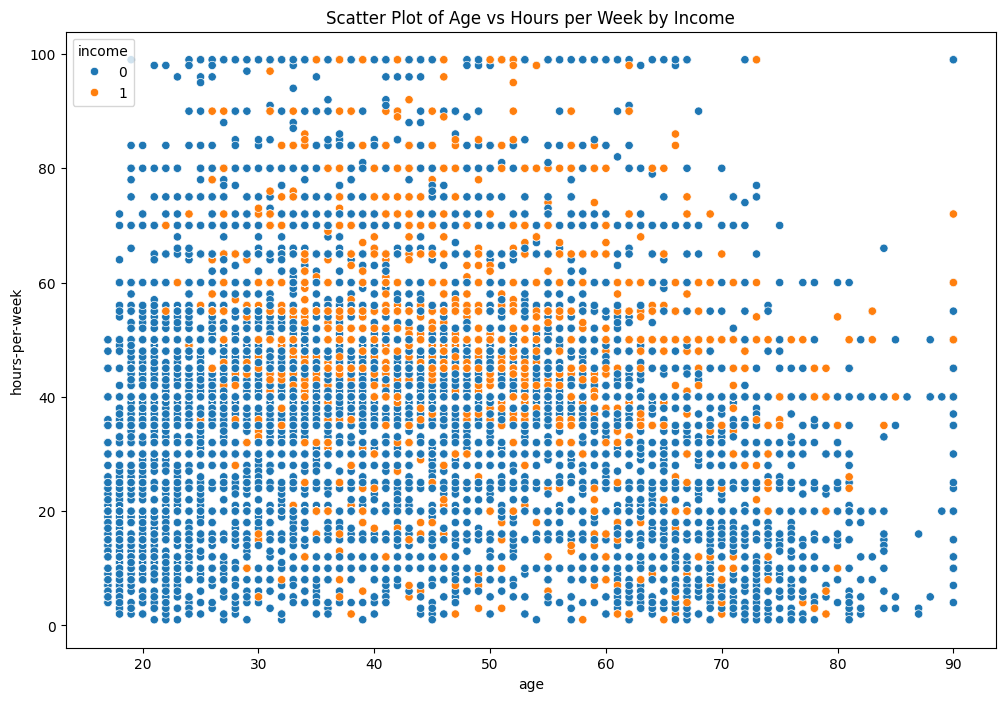

In [12]:
plt.figure(figsize=(12, 8))  # Increase figure size for a larger plot
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df)
plt.title('Scatter Plot of Age vs Hours per Week by Income')
plt.show()

# membuat scatter plot yang menunjukkan hubungan antara usia ('age') dan jam kerja per minggu ('hours-per-week')
# dengan warna titik yang berbeda berdasarkan 'income'. Plot ini membantu dalam memvisualisasikan hubungan antar
# variabel dan melihat apakah ada pola yang muncul.

# Preprocessing dan Split Data

In [13]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Ukuran Data Train: {X_train.shape}")
print(f"Ukuran Data Test: {X_test.shape}")

# membagi data menjadi data latih (training data) dan data uji (testing data). Data latih digunakan untuk melatih
# model machine learning, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah
# dilihat sebelumnya

Ukuran Data Train: (34189, 14)
Ukuran Data Test: (14653, 14)


# Decision Tree

In [14]:
# Step a: Defining the Decision Tree model using criterion 'entropy'
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)
# Kode tersebut mendefinisikan dan melatih model Decision Tree Classifier menggunakan kriteria pemisahan entropy
# dengan kedalaman maksimum 3 dan seed acak 42 untuk hasil yang konsisten.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [15]:
# Step b: Predict the test set results
dt_predictions = dt_model.predict(X_test)
#  membuat prediksi pada data uji (X_test) menggunakan model Decision Tree yang telah dilatih (dt_model).
# Hasil prediksi disimpan dalam variabel dt_predictions.

In [16]:
# Step c: Check accuracy score
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy (using Entropy):", dt_accuracy)
# menghitung akurasi model Decision Tree dengan membandingkan prediksi (dt_predictions) dengan nilai target
# yang sebenarnya (y_test). Akurasi menunjukkan proporsi prediksi yang benar dari total prediksi.

Decision Tree Accuracy (using Entropy): 0.8454923906367297


In [17]:
# Step d: Check for overfitting and underfitting
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
test_accuracy = dt_accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.8371698499517388
Testing Accuracy: 0.8454923906367297


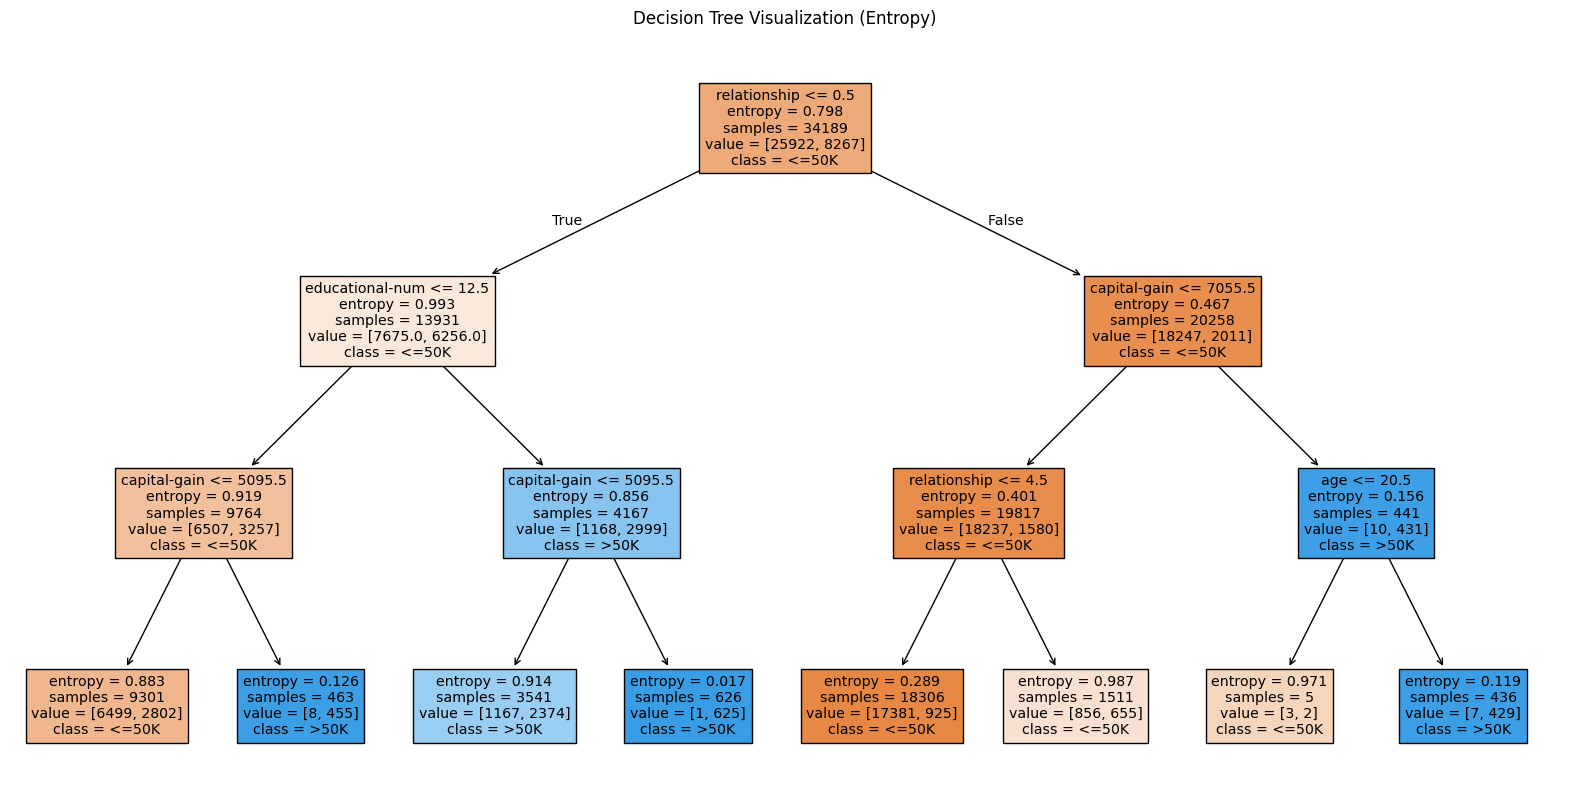

In [18]:
# Step e: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["<=50K", ">50K"], filled=True)
plt.title("Decision Tree Visualization (Entropy)")
plt.show()

# digunakan untuk memvisualisasikan struktur pohon keputusan yang telah dibangun oleh model dt_model.
# Visualisasi ini membantu dalam memahami bagaimana model membuat keputusan berdasarkan fitur-fitur yang ada.

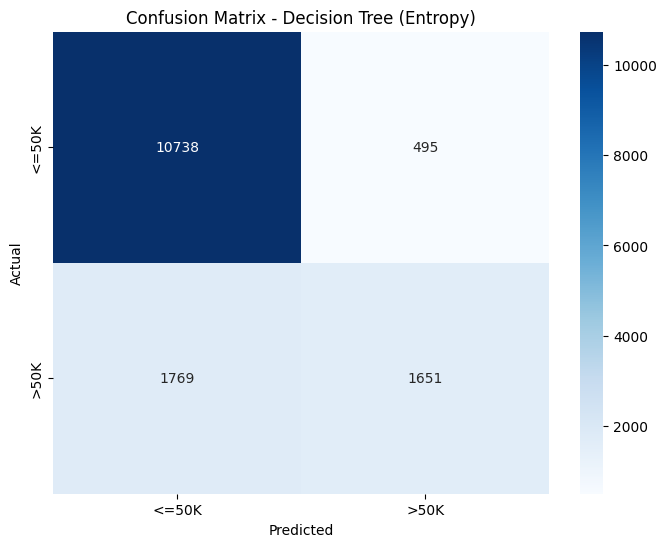

In [19]:
# Step f: Confusion Matrix
conf_matrix = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Entropy)")
plt.show()
# membuat confusion matrix yang menunjukkan kinerja model dalam mengklasifikasikan data. Confusion matrix memberikan
# informasi tentang jumlah prediksi yang benar dan salah untuk setiap kelas.

In [20]:
# Step g: Classification Report
print("Classification Report - Decision Tree (Entropy):")
print(classification_report(y_test, dt_predictions))
# menghasilkan laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, F1-score, dan support untuk
# setiap kelas. Laporan ini memberikan gambaran yang lebih komprehensif tentang kinerja model.

Classification Report - Decision Tree (Entropy):
              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11233
           1       0.77      0.48      0.59      3420

    accuracy                           0.85     14653
   macro avg       0.81      0.72      0.75     14653
weighted avg       0.84      0.85      0.83     14653



In [21]:
# Step h: Results and Conclusion
print(f"The Decision Tree model using 'Entropy' criterion achieved an accuracy of {dt_accuracy:.2f}.")


Results and Conclusion:
The Decision Tree model using 'Entropy' criterion achieved an accuracy of 0.85.
The confusion matrix and classification report provide insights into the precision, recall, and f1-score for each class.
Based on the training and testing accuracy comparison, we can assess if the model is overfitting or underfitting.
Further tuning of the tree depth or other hyperparameters might improve model performance.


# Random Forest


In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# membuat dan melatih model Random Forest. Random Forest adalah metode ensemble learning yang menggabungkan beberapa
# decision tree untuk meningkatkan akurasi dan mengurangi overfitting.

RandomForestClassifier(random_state=42)

In [23]:
rf_predictions = rf_model.predict(X_test)

In [24]:
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.75      0.64      0.69      3420

    accuracy                           0.87     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.87      0.86     14653

Confusion Matrix:
 [[10493   740]
 [ 1233  2187]]


In [25]:
print("\nRandom Forest Model")
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Model
Accuracy: 0.8653518050911077


# Naive Bayes

In [26]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# membuat dan melatih model Naive Bayes. Naive Bayes adalah algoritma klasifikasi probabilistik yang didasarkan pada
# teorema Bayes.

GaussianNB()

In [27]:
nb_predictions = nb_model.predict(X_test)

In [28]:
print("\nNaive Bayes Model")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))


Naive Bayes Model
Accuracy: 0.7997679656043131
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     11233
           1       0.65      0.31      0.42      3420

    accuracy                           0.80     14653
   macro avg       0.73      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653

Confusion Matrix:
 [[10649   584]
 [ 2350  1070]]


# Perbandingan


In [36]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print(f"Random Forest memiliki nilai akurasi tertinggi dengan angka, {accuracy_score(y_test, rf_predictions)} ")

Decision Tree Accuracy: 0.8454923906367297
Random Forest Accuracy: 0.8653518050911077
Naive Bayes Accuracy: 0.7997679656043131
Random Forest memiliki nilai akurasi tertinggi dengan angka, 0.8653518050911077 
